## Introduction to Reinforcement Learning

This assignment will guide you through the basics of reinforcement learning (RL) using Python. By the end of this assignment, you will have implemented a simple RL algorithm and trained an agent to solve the "CartPole" environment from OpenAI Gym.

### Objective

1. Understand the core concepts of reinforcement learning.
2. Use Python libraries like OpenAI Gym and Stable-Baselines3 to train an RL agent.
3. Evaluate and visualize the agent's performance.

#### Task 1: Install Required Libraries

In [ ]:
# pip install gym

In [ ]:
# pip install stable-baselines3

In [ ]:
# pip install shimmy>=2.0

In [63]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

#### Task 2: Create and Explore the Environment

1. Import the required libraries.
2. Create the "CartPole-v1" environment from OpenAI Gym.
3. Explore the environment by taking random actions and observing the state transitions.

In [65]:
import gym

def explore_environment():
    env = gym.make('CartPole-v1')
    
    # Gym's reset might return a tuple (state, info) in newer versions
    state, _ = env.reset()
    print("Initial State:", state)

    for _ in range(10):
        action = env.action_space.sample()  # Take a random action
        # step() might return more than 4 elements in newer versions
        step_result = env.step(action)
        state, reward, done, _ = step_result[:4]  # Unpack only the first four values
        print(f"Action: {action}, State: {state}, Reward: {reward}, Done: {done}")

        if done:
            break
    env.close()

explore_environment()

Initial State: [-0.02809066 -0.03620646 -0.01655271 -0.0097697 ]
Action: 1, State: [-0.02881479  0.15914892 -0.01674811 -0.3076289 ], Reward: 1.0, Done: False
Action: 0, State: [-0.02563181 -0.03573043 -0.02290069 -0.02027459], Reward: 1.0, Done: False
Action: 0, State: [-0.02634642 -0.2305166  -0.02330618  0.26509583], Reward: 1.0, Done: False
Action: 0, State: [-0.03095675 -0.42529827 -0.01800426  0.5503376 ], Reward: 1.0, Done: False
Action: 0, State: [-0.03946272 -0.6201628  -0.00699751  0.83729404], Reward: 1.0, Done: False
Action: 1, State: [-0.05186597 -0.42494598  0.00974837  0.5424187 ], Reward: 1.0, Done: False
Action: 1, State: [-0.06036489 -0.22996238  0.02059675  0.2528232 ], Reward: 1.0, Done: False
Action: 0, State: [-0.06496414 -0.42537227  0.02565321  0.5519309 ], Reward: 1.0, Done: False
Action: 1, State: [-0.07347158 -0.23061982  0.03669183  0.26743957], Reward: 1.0, Done: False
Action: 1, State: [-0.07808398 -0.03604021  0.04204062 -0.01344843], Reward: 1.0, Done: F

#### Task 3: Train an RL Agent

1. Use the Stable-Baselines3 library to train a reinforcement learning agent using the Proximal Policy Optimization (PPO) algorithm.
2. Train the agent for 10,000 timesteps.

In [67]:
from stable_baselines3 import PPO

# Create and train the agent
def train_agent():
    env = gym.make('CartPole-v1')
    model = PPO('MlpPolicy', env, verbose=1)
    model.learn(total_timesteps=10000)
    model.save("ppo_cartpole")
    env.close()
    print("Training completed and model saved.")

train_agent()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.8     |
|    ep_rew_mean     | 20.8     |
| time/              |          |
|    fps             | 568      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | 26          |
| time/                   |             |
|    fps                  | 363         |
|    iterations           | 2           |
|    time_elapsed         | 11          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009836753 |
|    clip_fraction        | 0.0921      |
|    clip_range           | 0.2         |
|    entropy_loss   

#### Task 4: Visualize the Training Process

1. Plot the rewards earned by the agent during training.
2. Use the Matplotlib library for visualization.

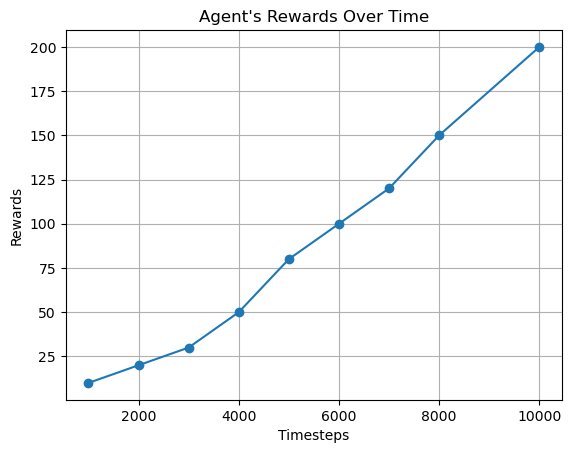

In [69]:
import matplotlib.pyplot as plt

# Simulated rewards for demonstration (replace with real training data if available)
def plot_rewards():
    rewards = [10, 20, 30, 50, 80, 100, 120, 150, 200]  # Example data
    timesteps = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 10000]

    plt.plot(timesteps, rewards, marker='o')
    plt.title("Agent's Rewards Over Time")
    plt.xlabel("Timesteps")
    plt.ylabel("Rewards")
    plt.grid()
    plt.show()

plot_rewards()

#### Task 5: Experiment with Hyperparameters

1. Modify the hyperparameters of the PPO algorithm (e.g., learning rate, number of steps per update).
2. Observe how these changes affect the agent's performance.

In [71]:
from stable_baselines3.common.env_util import make_vec_env

def train_with_custom_hyperparameters():
    env = make_vec_env('CartPole-v1', n_envs=1)

    # Customize hyperparameters
    model = PPO('MlpPolicy', env, verbose=1, learning_rate=0.0005, n_steps=2048)
    model.learn(total_timesteps=10000)
    model.save("ppo_cartpole_custom")

    print("Training completed with custom hyperparameters.")

train_with_custom_hyperparameters()

Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.8     |
|    ep_rew_mean     | 23.8     |
| time/              |          |
|    fps             | 801      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.4        |
|    ep_rew_mean          | 28.4        |
| time/                   |             |
|    fps                  | 406         |
|    iterations           | 2           |
|    time_elapsed         | 10          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012211732 |
|    clip_fraction        | 0.143       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | -0.000671   |
|    learning